# Deep Learning for Image Classification

Welcome to deep learning for image classification tutorial!
**In this notebook, you will**:
- Learn the basics of PyTorch, a powerful but easy to use package for scientific computing (and deep learning)
- Learn how to build and train a convolutional neural network for image classification.

If you have never used jupyter notebooks, nor Colab notebooks, [here](https://colab.research.google.com/notebooks/welcome.ipynb) is a short intro.


## I. PyTorch Tutorial

We will briefly go through the basics of the PyTorch package, playing with toy examples.

If you know already how to use PyTorch, then you can directly go to the second part of this tutorial

## II. Training a classifier

In this part, we will train a Convolutional Neural Network to classify images of 10 different classes (dogs, cats, car, ...) and see how our model performs on the test set.  


## III. Exploring CNN Architectures

This is the part where you get your hands dirty ;). Your mission is to experiment different CNN architectures and set hyperparameters in order to obtain the best accuracy on the test set!


The following command sets the backend of matplotlib to the 'inline' backend so that the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it:

In [0]:
%matplotlib inline

### Plotting functions and useful imports

You can skip this part

In [0]:
# Python 2/3 compatibility
from __future__ import print_function, division

import itertools
import time


import numpy as np
import matplotlib.pyplot as plt

# Colors from Colorbrewer Paired_12
colors = [[31, 120, 180], [51, 160, 44]]
colors = [(r / 255, g / 255, b / 255) for (r, g, b) in colors]

# functions to show an image
def imshow(img):
    """
    :param img: (PyTorch Tensor)
    """
    # unnormalize
    img = img / 2 + 0.5     
    # Convert tensor to numpy array
    npimg = img.numpy()
    # Color channel first -> color channel last
    plt.imshow(np.transpose(npimg, (1, 2, 0)))



def plot_losses(train_history, val_history):
    x = np.arange(1, len(train_history) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(x, train_history, color=colors[0], label="Training loss", linewidth=2)
    plt.plot(x, val_history, color=colors[1], label="Validation loss", linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title("Evolution of the training and validation loss")
    plt.show()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    :param cm: (numpy matrix) confusion matrix
    :param classes: [str]
    :param normalize: (bool)
    :param title: (str)
    :param cmap: (matplotlib color map)
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 8))   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# I. What is PyTorch ?

It’s a Python based scientific computing package targeted at two sets of audiences:

- A replacement for numpy to use the power of GPUs
- A deep learning research platform that provides maximum flexibility and speed


## PyTorch Basics

In the next steps, we will briefly see how to use PyTorch and exploit its power:

1. PyTorch Installation
2. PyTorch Tensors
3. Numpy Bridge
4. Automatic differentiation
5. PyTorch and GPU (CUDA support)


### 1. Install PyTorch and Torchvision



In [0]:
!pip install http://download.pytorch.org/whl/cu92/torch-0.4.1-cp36-cp36m-linux_x86_64.whl
!pip install torchvision

     |████████████████████████████████| 512.6MB 107.5MB/s 
ERROR: torchvision 0.5.0 has requirement torch==1.4.0, but you'll have torch 0.4.1 which is incompatible.
ERROR: fastai 1.0.60 has requirement torch>=1.0.0, but you'll have torch 0.4.1 which is incompatible.
  Found existing installation: torch 1.4.0
    Uninstalling torch-1.4.0:
      Successfully uninstalled torch-1.4.0
     |████████████████████████████████| 753.4MB 9.9kB/s 
  Found existing installation: torch 0.4.1
    Uninstalling torch-0.4.1:
      Successfully uninstalled torch-0.4.1


In [0]:
import numpy as np
# Import torch and create the alias "th"
# instead of writing torch.name_of_a_method() , we only need to write th.name_of_a_method()
# (similarly to numpy imported as np)
import torch as th

In [0]:
# Create tensor of ones (FloatTensor by default)
ones = th.ones(3, 2)
print(ones)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


### 2. PyTorch Tensors

A `torch.Tensor` is a multi-dimensional matrix containing elements of a single data type.

Tensors are similar to numpy’s ndarrays, but they have a super-power: Tensors can also be used on a GPU to accelerate computing.

#### Tensor Shape
To know the shape of a given tensor, you can use the `.size()` method (the numpy equivalent is `.shape`)

In [0]:
# Display the shape of a tensor
# it can be used as a tuple
print("Tensor Shape: {}".format(ones.size()))

Tensor Shape: torch.Size([3, 2])


#### Reshape tensors

To reshape tensors (e.g. flatten a 3D tensor to a 1D array), you can use the `.view()` method:

- **x.view(new_shape)**: Returns a new tensor with the same data but different size. It is the equivalent of numpy function *reshape* (Gives a new shape to an array without changing its data.). You can read the full documentation [here.](http://pytorch.org/docs/master/tensors.html#torch.Tensor.view)

[WARNING] when precising a new shape, you have to make sure that the number of elements is constant.
For example, a 2D matrix of size 3x3 can only be viewed as a 1D array of size $3 \cdot 3 = 9$

In [0]:
# Create a 3D tensor of size 3x2x2
zeros_3d_tensor = th.zeros(3, 2, 2)
print("Original size:", zeros_3d_tensor.size())

# Reshape it to a 1D array of size 3*2*2 = 12
zeros_1d_array = zeros_3d_tensor.view(3 * 2 * 2)
print("Reshaped tensor:", zeros_1d_array.size())


# Let's view our original tensor as a 2D matrix
# If you want PyTorch to guess one remaining dimension,
# you specify '-1' instead of the actual size
zeros_2d_matrix = zeros_3d_tensor.view(-1, 2 * 2)

print("Matrix shape:", zeros_2d_matrix.size())

Original size: torch.Size([3, 2, 2])
Reshaped tensor: torch.Size([12])
Matrix shape: torch.Size([3, 4])


#### Basic Operations on tensors

Tensor support all basic linear algebra operations. You can read the full documentation [here](http://pytorch.org/docs/master/tensors.html)

In [0]:
2 * ones + 1

tensor([[3., 3.],
        [3., 3.],
        [3., 3.]])

PyTorch tensors also supports numpy indexing:

In [0]:
print("\n Indexing Demo:")
print(ones[:, 1])


 Indexing Demo:
tensor([1., 1., 1.])


### 3. Numpy Bridge
WARNING: PyTorch Tensors are different from numpy arrays
even if they have a lot in common

Though, it is **easy with PyTorch to tranform Tensors to Numpy arrays and vice versa**

#### Numpy <-> PyTorch

Creating PyTorch tensors from numpy array is done via the `torch.from_numpy()` function  
(here `th.from_numpy()` because we renamed *torch* as *th*)

To transform a PyTorch tensor to a numpy array, you can simply call `.numpy()` method.

In [0]:
# np.float32 -> th.FloatTensor
ones_matrix = np.ones((2, 2), dtype=np.float32)

# the matrix is passed by reference:
# if we modify the original numpy array, the tensor is also edited
ones_tensor = th.from_numpy(ones_matrix)
# Convert back to a numpy matrix
numpy_matrix = ones_tensor.numpy()

print("PyTorch Tensor:")
print(ones_tensor)

print("Numpy Matrix:")
print(numpy_matrix)

PyTorch Tensor:
tensor([[1., 1.],
        [1., 1.]])
Numpy Matrix:
[[1. 1.]
 [1. 1.]]


### 4. Automatic Differentiation

Pytorch tensors allow to **automatically compute gradients**. That is particulary useful for backpropagation.

Once you finish your computation you can call `.backward()` and have all the gradients computed automatically.

You can access the gradient w.r.t. this variable using `.grad`.


In [0]:
# We need to specify that we want to compute the gradient
# as it requires extra memory and computation
ones_tensor = th.ones(2,2, requires_grad=True)

print(ones_tensor)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


To demonstrate the use of PyTorch Variable,
let's define a simple linear transformation of a variable $x$ :

$$y = a \cdot x + b$$

PyTorch will allows us to automatically compute $$\frac{dy}{dx} $$

In [0]:
# Create a tensor and tell PyTorch
# that we want to compute the gradient
x = th.ones(1, requires_grad=True)

# Transformation constants
a = 2
b = 5

# Define the tranformation and store the result
# in a new variable
y = a * x + b

print(y)

tensor([7.], grad_fn=<AddBackward0>)


Let's backprop!

In [0]:
y.backward()

`x.grad` prints the gradient:

$$\frac{dy}{dx} = a$$

because:

$$y = a \cdot x + b$$

In [0]:
x.grad

You can now change the values of $a$ and $b$ see their effects on the gradient
(HINT: `x.grad` only depends on the value of `a`)

### 5. PyTorch and GPU (CUDA support)

Google colab provides a CUDA enabled GPU, so we are going to use its power. 
You can move tensor to the GPU by simply using the `to()` method.
Otherwise, PyTorch will use the CPU.

Here, we will demonstrate the usefulness of the GPU on a simple matrix multiplication:

In [0]:
if th.cuda.is_available():
  # Create tensors
  x = th.ones(1000, 1000)
  y = 2 * x + 3
  # Do the calculation on cpu (default)
  start_time = time.time()
  # Matrix multiplication (for benchmark purpose)
  results = th.mm(x, y)
  time_cpu = time.time() - start_time
  
  # Do the same calculation but on the gpu
  # First move tensors to gpu
  x = x.to("cuda")
  y = y.to("cuda")
  start_time = time.time()
  # Matrix multiplication (for benchmark purpose)
  results = th.mm(x, y)
  time_gpu = time.time() - start_time
  
  print("Time on CPU: {:.5f}s \t Time on GPU: {:.5f}s".format(time_cpu, time_gpu))
  print("Speed up: Computation was {:.0f}X faster on GPU!".format(time_cpu / time_gpu))
  
else:
  print("You need to enable GPU accelaration in colab (runtime->change runtime type)")

Time on CPU: 0.03014s 	 Time on GPU: 0.00147s
Speed up: Computation was 20X faster on GPU!


As expected, matrix multiplication is way faster on a GPU, so we'd better use it.


# II. Training a classifier


For this tutorial, we will use the CIFAR10 dataset.
There are 10 classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.


![CIFAR10](http://pytorch.org/tutorials/_images/cifar10.png)


Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalize the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

### 1. Loading and normalizing CIFAR10 Dataset

Using ``torchvision``, it’s extremely easy to load CIFAR10.

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

Seed the random generator to have reproducible results:

In [0]:
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

if th.cuda.is_available():
  # Make CuDNN Determinist
  th.backends.cudnn.deterministic = True
  th.cuda.manual_seed(seed)

# Define default device, we should use the GPU (cuda) if available
device = th.device("cuda" if th.cuda.is_available() else "cpu")


### Define subset of the dataset (so it is faster to train)

In [0]:
from torch.utils.data.sampler import SubsetRandomSampler

n_training_samples = 20000 # Max: 50 000 - n_val_samples
n_val_samples = 5000
n_test_samples = 5000

train_sampler = SubsetRandomSampler(np.arange(n_training_samples, dtype=np.int64))
val_sampler = SubsetRandomSampler(np.arange(n_training_samples, n_training_samples + n_val_samples, dtype=np.int64))
test_sampler = SubsetRandomSampler(np.arange(n_test_samples, dtype=np.int64))
# (In the last case, indexes do not need to account for training ones because the train=False parameter in datasets.CIFAR will select from the test set)

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1]



In [0]:
num_workers = 2
test_batch_size = 4

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=test_batch_size, sampler=train_sampler,
                                          num_workers=num_workers)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=test_batch_size, sampler=test_sampler,
                                         num_workers=num_workers)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Let us show some of the training images, for fun.



     horse      horse        dog       deer


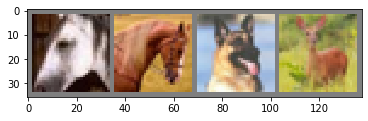

In [0]:
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('{:>10}'.format(classes[labels[j]]) for j in range(test_batch_size)))

### 2. Define a Convolution Neural Network


In [0]:
# Useful imports
import torch.nn as nn
import torch.nn.functional as F

####  Forward propagation

In PyTorch, there are built-in functions that carry out the convolution steps for you.

- **nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0):** Convolution layer. You can read the full documentation [here](http://pytorch.org/docs/master/nn.html#conv2d)

- **nn.MaxPool2d(kernel_size, stride=None, padding=0):** Max pooling layer. You can read the full documentation [here](http://pytorch.org/docs/master/nn.html#maxpool2d)

- **F.relu(Z1):** computes the elementwise ReLU of Z1 (which can be any shape). You can read the full documentation [here.](http://pytorch.org/docs/master/nn.html#torch.nn.ReLU)

- **x.view(new_shape)**: Returns a new tensor with the same data but different size. It is the equivalent of numpy function *reshape* (Gives a new shape to an array without changing its data). You can read the full documentation [here.](http://pytorch.org/docs/master/tensors.html#torch.Tensor.view)

- **nn.Linear(in_features, out_features):** Applies a linear transformation to the incoming data: $y = Ax + b$, it is also called a fully connected layer. You can read the full documentation [here.](http://pytorch.org/docs/master/nn.html#linear-layers)

#### Simple Convolutional Neural Network

ConvNet with one convolution layer followed by a max pooling operation,
one fully connected layer and an output layer

In [0]:
class SimpleConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(SimpleConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # cf comments in forward() to have step by step comments
        # on the shape (how we pass from a 3x32x32 input image to a 18x16x16 volume)
        self.fc1 = nn.Linear(18 * 16 * 16, 64) 
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x32x32
        x = F.relu(self.conv1(x))
        # 18x32x32 -> 18x16x16
        x = self.pool(x)
        # 18x16x16 -> 4608
        x = x.view(-1, 18 * 16 * 16)
        # 4608 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        # The softmax non-linearity is applied later (cf createLossAndOptimizer() fn)
        x = self.fc2(x)
        return x

#### Linear Classifier

In [0]:
class LinearClassifier(nn.Module):
    """
    Linear Classifier
    """
    def __init__(self):
        super(LinearClassifier, self).__init__()
        self.linear = nn.Linear(32 * 32 * 3, 10)

    def forward(self, x):
        # Flatten input 3x32x32 -> 3072
        x = x.view(x.size(0), -1)
        return self.linear(x)

### 3. Define a loss function and optimizer

Let's use a Classification Cross-Entropy loss and ADAM (optionally, SGD with momentum). You can read more about  [optimization methods](https://pytorch.org/docs/stable/optim.html).



In [0]:
import torch.optim as optim

def createLossAndOptimizer(net, learning_rate=0.001):
    # it combines softmax with negative log likelihood loss
    criterion = nn.CrossEntropyLoss()  
    #optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    return criterion, optimizer

### 4. Train the network


This is when things start to get interesting.
We simply have to loop over our data iterator, feed the inputs to the network, and optimize



#### Data loader

In [0]:
def get_train_loader(batch_size):
    return torch.utils.data.DataLoader(train_set, batch_size=batch_size, sampler=train_sampler,
                                              num_workers=num_workers)

# Use larger batch size for validation to speed up computation
val_loader = torch.utils.data.DataLoader(train_set, batch_size=128, sampler=val_sampler,
                                          num_workers=num_workers)

#### Training loop
The training script: it takes ~10s per epoch with batch_size = 32

In [0]:
def train(net, batch_size, n_epochs, learning_rate):
    """
    Train a neural network and print statistics of the training
    
    :param net: (PyTorch Neural Network)
    :param batch_size: (int)
    :param n_epochs: (int)  Number of iterations on the training set
    :param learning_rate: (float) learning rate used by the optimizer
    """
    print("===== HYPERPARAMETERS =====")
    print("batch_size=", batch_size)
    print("n_epochs=", n_epochs)
    print("learning_rate=", learning_rate)
    print("=" * 30)
    
    train_loader = get_train_loader(batch_size)
    n_minibatches = len(train_loader)

    criterion, optimizer = createLossAndOptimizer(net, learning_rate)
    # Init variables used for plotting the loss
    train_history = []
    val_history = []

    training_start_time = time.time()
    best_error = np.inf
    best_model_path = "best_model.pth"
    
    # Move model to gpu if possible
    net = net.to(device)

    for epoch in range(n_epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        print_every = n_minibatches // 10
        start_time = time.time()
        total_train_loss = 0
        
        for i, (inputs, labels) in enumerate(train_loader):

            # Move tensors to correct device
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            total_train_loss += loss.item()

            # print every 10th of epoch
            if (i + 1) % (print_every + 1) == 0:    
                print("Epoch {}, {:d}% \t train_loss: {:.2f} took: {:.2f}s".format(
                      epoch + 1, int(100 * (i + 1) / n_minibatches), running_loss / print_every,
                      time.time() - start_time))
                running_loss = 0.0
                start_time = time.time()

        train_history.append(total_train_loss / len(train_loader))

        total_val_loss = 0
        # Do a pass on the validation set
        # We don't need to compute gradient,
        # we save memory and computation using th.no_grad()
        with th.no_grad():
          for inputs, labels in val_loader:
              # Move tensors to correct device
              inputs, labels = inputs.to(device), labels.to(device)
              # Forward pass
              predictions = net(inputs)
              val_loss = criterion(predictions, labels)
              total_val_loss += val_loss.item()
            
        val_history.append(total_val_loss / len(val_loader))
        # Save model that performs best on validation set
        if total_val_loss < best_error:
            best_error = total_val_loss
            th.save(net.state_dict(), best_model_path)

        print("Validation loss = {:.2f}".format(total_val_loss / len(val_loader)))

    print("Training Finished, took {:.2f}s".format(time.time() - training_start_time))
    
    # Load best model
    net.load_state_dict(th.load(best_model_path))
    
    return train_history, val_history

In [0]:
net = SimpleConvolutionalNetwork()

train_history, val_history = train(net, batch_size=32, n_epochs=10, learning_rate=0.001)

===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.05 took: 0.66s
Epoch 1, 20% 	 train_loss: 1.86 took: 0.56s
Epoch 1, 30% 	 train_loss: 1.79 took: 0.51s
Epoch 1, 40% 	 train_loss: 1.70 took: 0.57s
Epoch 1, 50% 	 train_loss: 1.63 took: 0.53s
Epoch 1, 60% 	 train_loss: 1.58 took: 0.54s
Epoch 1, 70% 	 train_loss: 1.51 took: 0.54s
Epoch 1, 80% 	 train_loss: 1.47 took: 0.53s
Epoch 1, 90% 	 train_loss: 1.47 took: 0.52s
Validation loss = 1.34
Epoch 2, 10% 	 train_loss: 1.40 took: 0.62s
Epoch 2, 20% 	 train_loss: 1.41 took: 0.52s
Epoch 2, 30% 	 train_loss: 1.31 took: 0.50s
Epoch 2, 40% 	 train_loss: 1.32 took: 0.56s
Epoch 2, 50% 	 train_loss: 1.35 took: 0.52s
Epoch 2, 60% 	 train_loss: 1.30 took: 0.53s
Epoch 2, 70% 	 train_loss: 1.29 took: 0.53s
Epoch 2, 80% 	 train_loss: 1.23 took: 0.54s
Epoch 2, 90% 	 train_loss: 1.31 took: 0.54s
Validation loss = 1.29
Epoch 3, 10% 	 train_loss: 1.20 took: 0.62s
Epoch 3, 20% 	 train_loss: 1.16 took: 0.5

Now, let's look at the evolution of the losses

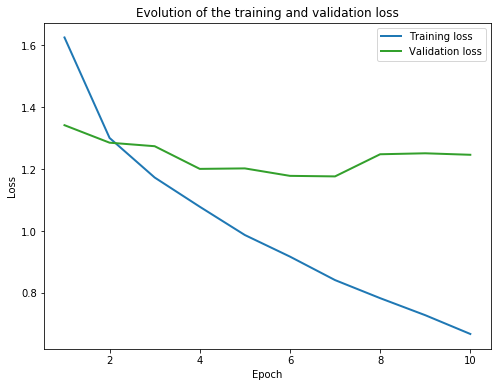

In [0]:
plot_losses(train_history, val_history)

### 5. Test the network on the test data


We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



Ground truth:

       cat      plane        car       frog


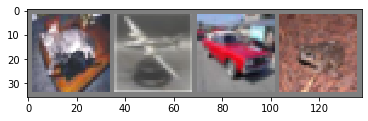

In [0]:
try:
  images, labels = next(iter(test_loader))
except EOFError:
  pass

# print images
imshow(torchvision.utils.make_grid(images))
print("Ground truth:\n")

print(' '.join('{:>10}'.format(classes[labels[j]]) for j in range(test_batch_size)))

Okay, now let us see what the neural network thinks these examples above are:



In [0]:
outputs = net(images.to(device))
print(outputs.size())

torch.Size([4, 10])


The outputs are energies for the 10 classes.
The higher the energy for a class, the more the network
thinks that the image is from that particular class.
So, let's get the index of the highest energy:



Predicted:

      frog      plane        car       frog


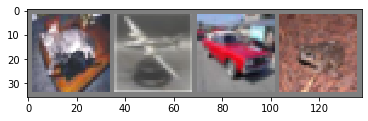

In [0]:
_, predicted = torch.max(outputs, 1)

print("Predicted:\n")
imshow(torchvision.utils.make_grid(images))

print(' '.join('{:>10}'.format(classes[predicted[j]]) for j in range(test_batch_size)))

The results seem pretty good.

Let us look at how the network performs on the whole test set.



In [0]:
def dataset_accuracy(net, data_loader, name=""):
    net = net.to(device)
    correct = 0
    total = 0
    for images, labels in data_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
    accuracy = 100 * float(correct) / total
    print('Accuracy of the network on the {} {} images: {:.2f} %'.format(total, name, accuracy))

def train_set_accuracy(net):
    dataset_accuracy(net, train_loader, "train")

def val_set_accuracy(net):
    dataset_accuracy(net, val_loader, "validation")  
    
def test_set_accuracy(net):
    dataset_accuracy(net, test_loader, "test")

def compute_accuracy(net):
    train_set_accuracy(net)
    val_set_accuracy(net)
    test_set_accuracy(net)
    
print("Computing accuracy...")
compute_accuracy(net)

Computing accuracy...
Accuracy of the network on the 20000 train images: 75.10 %
Accuracy of the network on the 5000 validation images: 59.62 %
Accuracy of the network on the 5000 test images: 59.56 %


That initial 59.78 % on the test set of images looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.
As a baseline, a linear model achieves around 30% accuracy.

What are the classes that performed well, and the classes that did not perform well?



In [0]:
def accuracy_per_class(net):
    net = net.to(device)
    n_classes = 10
    # (real, predicted)
    confusion_matrix = np.zeros((n_classes, n_classes), dtype=np.int64)

    for images, labels in test_loader:
        images, labels = images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        for i in range(test_batch_size):
            confusion_matrix[labels[i], predicted[i]] += 1
            label = labels[i]

    print("{:<10} {:^10}".format("Class", "Accuracy (%)"))
    for i in range(n_classes):
        class_total = confusion_matrix[i, :].sum()
        class_correct = confusion_matrix[i, i]
        percentage_correct = 100.0 * float(class_correct) / class_total
        
        print('{:<10} {:^10.2f}'.format(classes[i], percentage_correct))
    return confusion_matrix

confusion_matrix = accuracy_per_class(net)

Class      Accuracy (%)
plane        68.85   
car          74.06   
bird         48.63   
cat          39.03   
deer         58.38   
dog          46.72   
frog         69.65   
horse        63.43   
ship         66.67   
truck        60.23   


### Confusion Matrix

Let's look at what type of error our networks makes... 
It seems that our network is pretty good at classifying ships,
but has some difficulties to differentiate cats and dogs.
Also, it classifies a lot of trucks as cars.

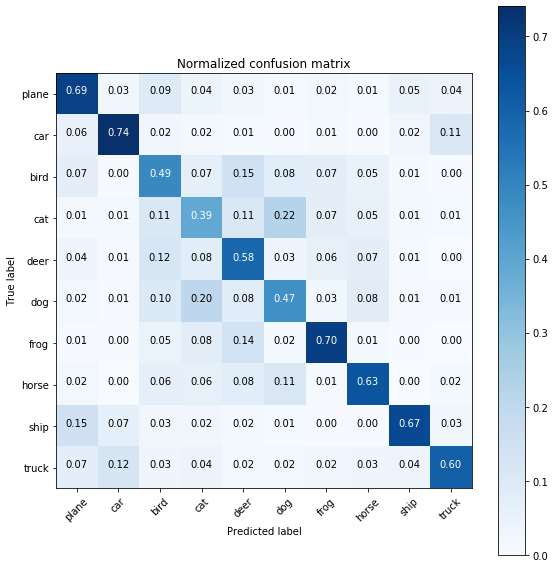

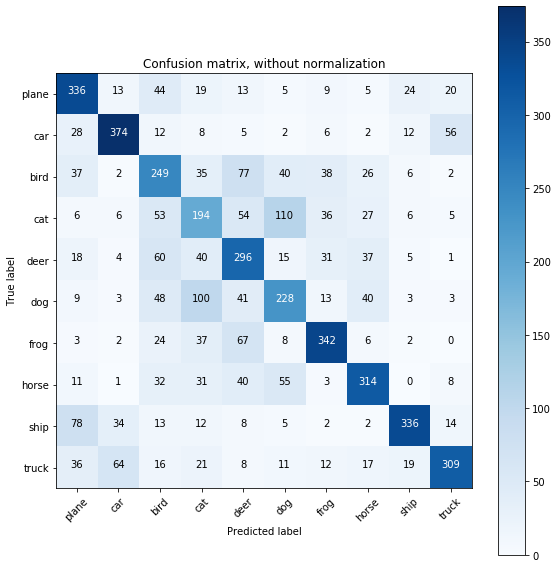

In [0]:
# Plot normalized confusion matrix
plot_confusion_matrix(confusion_matrix, classes, normalize=True,
                      title='Normalized confusion matrix')

# Plot non-normalized confusion matrix
plot_confusion_matrix(confusion_matrix, classes,
                      title='Confusion matrix, without normalization')

# III. Exploring CNN Architectures

Now, it is your turn to build a Convolutional Neural Network. The goal of this section is to explore different CNN architectures and set hyperparameters in order to obtain the best accuracy on the **test** set!

The network that you have to tweak is called **MyConvolutionalNetwork**.

You can start changing the batch_size, number of epochs and then try adding more convolutional layers.

### PyTorch functions to build the network
- **nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0):** Convolution layer. You can read the full documentation [here](http://pytorch.org/docs/master/nn.html#conv2d)

- **nn.MaxPool2d(kernel_size, stride=None, padding=0):** Max pooling layer. You can read the full documentation [here](http://pytorch.org/docs/master/nn.html#maxpool2d)

- **F.relu(Z1):** computes the element-wise ReLU of Z1 (which can be of any shape). You can read the full documentation [here.](http://pytorch.org/docs/master/nn.html#torch.nn.ReLU)

- **x.view(new_shape)**: Returns a new tensor with the same data but different size. It is the equivalent of numpy function *reshape* (Gives a new shape to an array without changing its data.). You can read the full documentation [here.](http://pytorch.org/docs/master/tensors.html#torch.Tensor.view)

- **nn.Linear(in_features, out_features):** Applies a linear transformation to the incoming data: $y = Ax + b$, it is also called a fully connected (fc) layer. You can read the full documentation [here.](http://pytorch.org/docs/master/nn.html#linear-layers)

**Convolution Formulas**:

The formulas relating the output shape $(C_2, H_2, W_2)$ of the convolution to the input shape $(C_1, H_1, W_1)$ are:


$$ H_2 = \lfloor \frac{H_1 - kernel\_size + 2 \times padding}{stride} \rfloor +1 $$

$$ W_2 = \lfloor \frac{W_1 - kernel\_size + 2 \times padding}{stride} \rfloor +1 $$

$$ C_2 = \text{number of filters used in the convolution}$$

NOTE: $C_2 = C_1$ in the case of max pooling

where:
- $H_2$: height of the output volume  
- $W_2$: width of the output volume  
- $C_1$: in_channels, number of channels in the input volume
- $C_2$: out_channels

In [0]:
def get_output_size(in_size, kernel_size, stride=1, padding=0):
    """
    Get the output size given all the parameters of the convolution
    :param in_size: (int) input size
    :param kernel_size: (int)
    :param stride: (int)
    :param paddind: (int)
    :return: (int)
    """
    return int((in_size - kernel_size + 2 * padding) / stride) + 1

#### Example of use of helper method get_output_size() 

Let's assume you have an *input volume of size 3x32x32* (where 3 is the number of channels)
and you use a 2D convolution with the following parameters:

```python
conv1 = nn.Conv2d(3, 18, kernel_size=7, stride=2, padding=1)
```
then, the size of the output volume is 18x?x? (because we have 18 filters) where ? is given by the convolution formulas (see above).

**get_output_size()** function allows to compute that size:

```
out_size = get_output_size(in_size=32, kernel_size=7, stride=2, padding=1)
print(out_size) # prints 14
```

That is to say, *the output volume is 18x14x14*

In [0]:
out_size = get_output_size(in_size=32, kernel_size=3, stride=1, padding=1)
print(out_size)

32


Below is the neural network you have to edit:

In [0]:
class MyConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        #### START CODE: ADD NEW LAYERS ####
        # (do not forget to update `flattened_size`:
        # the input size of the first fully connected layer self.fc1)
        # self.conv2 = ...

        #The second layer has 18 entries and 18 outputs (allowing to keep same entry format for the last layer)
        #Fully connected layer
        self.conv2 = torch.nn.Conv2d(18, 18, kernel_size=3, stride=1, padding=1)
        # Size of the output of the last convolution:
        
        #Uptading flattened size
        self.flattened_size = 18 * 8 * 8
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x32x32
        x = F.relu(self.conv1(x))
        # 18x32x32 -> 18x16x16
        x = self.pool(x)
        
        #### START CODE: USE YOUR NEW LAYERS HERE ####
        # x = ...
        x = F.relu(self.conv2(x))
        #self.conv2 = torch.nn.Conv2d(18, 18, kernel_size=3, stride=1, padding=1)
        # 18x32x32 -> 18x16x16
        x = self.pool(x)
        #### END CODE ####
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 18x16x16 -> 4608
        x = x.view(-1, self.flattened_size)
        # 4608 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        x = self.fc2(x)
        return x

# **Comments 1**
The following convolution network has two layers (a first one applies 18 filters at the 3 channel input and the second one is a fully connected layer ) and its testing parameters are batch_size=32, n_epochs=10, learning_rate=0.001).

Calculating the metrics for the following neural network, the following was observed:

The accuracy of the training was consistently higher than the testing, which indicates an over fitting

The class less accurately identify is the birds.

The validation loss becomes more or less constant as the epochs pass,whilst the the trainning loss diminishes. This also indicates an overfitting.

**Parameters:**

learning rates: 0.001

batch size: 32

nr of epochs: 10

test accuracy: 63.62%

train accuracy: 74.81%

final validation loss: 1.06

final traning loss:  0.85


number of images in training set : 20000

number of images in testing and validation set : 5000

In [0]:
net = MyConvolutionalNetwork()
train_history, val_history = train(net, batch_size=32, n_epochs=10, learning_rate=0.001)
compute_accuracy(net)


===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.19 took: 0.66s
Epoch 1, 20% 	 train_loss: 1.93 took: 0.58s
Epoch 1, 30% 	 train_loss: 1.82 took: 0.56s
Epoch 1, 40% 	 train_loss: 1.70 took: 0.60s
Epoch 1, 50% 	 train_loss: 1.65 took: 0.58s
Epoch 1, 60% 	 train_loss: 1.65 took: 0.56s
Epoch 1, 70% 	 train_loss: 1.61 took: 0.58s
Epoch 1, 80% 	 train_loss: 1.57 took: 0.57s
Epoch 1, 90% 	 train_loss: 1.53 took: 0.57s
Validation loss = 1.44
Epoch 2, 10% 	 train_loss: 1.49 took: 0.69s
Epoch 2, 20% 	 train_loss: 1.41 took: 0.57s
Epoch 2, 30% 	 train_loss: 1.42 took: 0.59s
Epoch 2, 40% 	 train_loss: 1.37 took: 0.57s
Epoch 2, 50% 	 train_loss: 1.40 took: 0.56s
Epoch 2, 60% 	 train_loss: 1.38 took: 0.58s
Epoch 2, 70% 	 train_loss: 1.40 took: 0.58s
Epoch 2, 80% 	 train_loss: 1.38 took: 0.65s
Epoch 2, 90% 	 train_loss: 1.34 took: 0.62s
Validation loss = 1.31
Epoch 3, 10% 	 train_loss: 1.29 took: 0.69s
Epoch 3, 20% 	 train_loss: 1.24 took: 0.5

# **Comments 2**
Using a higher epoch (epoch=20), that is running further trainning in order to get higher accuracy result. 
The following was observed:

The training loss continuosly decreased while the validation loss started to rise. Consequently, a higher epoch has only made the overfitting more  prominent.

There was a small rise in accuracy (aproximately 2%).

Therefore, one can state that the problem is not the number of epoch, that is there are enough of cycles through the full training dataset, which makes sense since the problem is overfitting not under fitting. 

**Parameters:**

learning rates: 0.001

batch size: 32

nr of epochs: 20

test accuracy: 63.92%

training accuracy: 74.89%

final validation loss: 1.37

final training loss: 0.5

number of images in training set : 20000

number of images in testing and validation set : 5000


PS: A smaller epoch, for example,epoch=5, could be called an early stop as it avoids the overfitting behavior, nevertheless the losses are rather high in the validation and training phase.



In [0]:
net = MyConvolutionalNetwork()
train_history, val_history = train(net, batch_size=32, n_epochs=20, learning_rate=0.001)
compute_accuracy(net)

===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 20
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.21 took: 0.69s
Epoch 1, 20% 	 train_loss: 1.94 took: 0.56s
Epoch 1, 30% 	 train_loss: 1.81 took: 0.59s
Epoch 1, 40% 	 train_loss: 1.71 took: 0.58s
Epoch 1, 50% 	 train_loss: 1.66 took: 0.57s
Epoch 1, 60% 	 train_loss: 1.53 took: 0.60s
Epoch 1, 70% 	 train_loss: 1.54 took: 0.61s
Epoch 1, 80% 	 train_loss: 1.49 took: 0.62s
Epoch 1, 90% 	 train_loss: 1.48 took: 0.66s
Validation loss = 1.38
Epoch 2, 10% 	 train_loss: 1.40 took: 0.70s
Epoch 2, 20% 	 train_loss: 1.38 took: 0.60s
Epoch 2, 30% 	 train_loss: 1.43 took: 0.64s
Epoch 2, 40% 	 train_loss: 1.39 took: 0.64s
Epoch 2, 50% 	 train_loss: 1.38 took: 0.57s
Epoch 2, 60% 	 train_loss: 1.33 took: 0.60s
Epoch 2, 70% 	 train_loss: 1.33 took: 0.59s
Epoch 2, 80% 	 train_loss: 1.32 took: 0.58s
Epoch 2, 90% 	 train_loss: 1.29 took: 0.59s
Validation loss = 1.25
Epoch 3, 10% 	 train_loss: 1.21 took: 0.72s
Epoch 3, 20% 	 train_loss: 1.25 took: 0.5

# **Comments 3**
Now, we tried to raise the learning rate, in order to see if the same accuracy could be reached faster. 
The following was observed:

There was a decresead of accuracy in general, which indicates that the chosen learning rate does not enable the network to find the minima and maxima, as the steps are not refined.

Furthermore, the validation loss became higher. Therefore, the smaller learning rate is more useful.

**Parameters:**

learning rates: 0.01

batch size: 32

nr of epochs: 10

test accuracy: 54.12 %


training accuracy: 58.98 %

final validation loss: 1.49

final training loss: 0.99

number of images in training set : 20000

number of images in testing and validation set : 5000

In [0]:
train_history, val_history = train(net, batch_size=32, n_epochs=10, learning_rate=0.01)
compute_accuracy(net)

===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.01
Epoch 1, 10% 	 train_loss: 1.66 took: 0.72s
Epoch 1, 20% 	 train_loss: 1.50 took: 0.58s
Epoch 1, 30% 	 train_loss: 1.45 took: 0.58s
Epoch 1, 40% 	 train_loss: 1.45 took: 0.57s
Epoch 1, 50% 	 train_loss: 1.35 took: 0.57s
Epoch 1, 60% 	 train_loss: 1.38 took: 0.57s
Epoch 1, 70% 	 train_loss: 1.33 took: 0.57s
Epoch 1, 80% 	 train_loss: 1.33 took: 0.58s
Epoch 1, 90% 	 train_loss: 1.34 took: 0.57s
Validation loss = 1.31
Epoch 2, 10% 	 train_loss: 1.22 took: 0.67s
Epoch 2, 20% 	 train_loss: 1.24 took: 0.57s
Epoch 2, 30% 	 train_loss: 1.24 took: 0.59s
Epoch 2, 40% 	 train_loss: 1.23 took: 0.60s
Epoch 2, 50% 	 train_loss: 1.29 took: 0.65s
Epoch 2, 60% 	 train_loss: 1.26 took: 0.61s
Epoch 2, 70% 	 train_loss: 1.28 took: 0.60s
Epoch 2, 80% 	 train_loss: 1.24 took: 0.57s
Epoch 2, 90% 	 train_loss: 1.22 took: 0.58s
Validation loss = 1.31
Epoch 3, 10% 	 train_loss: 1.14 took: 0.68s
Epoch 3, 20% 	 train_loss: 1.14 took: 0.58

# **Comments 4**
Finally, we tried to change the batch size, the batch is the number of saple processed before the updating of the model. 
We chose a batch size of 64, the following was observed:

Again there was a decrease in the training loss, but a raise in validation loss, indicating the overfitting. 

Nevertheless comparing to the previous test, there was a higher accuracy. 


**Parameters:**

learning rates: 0.001

batch size: 64

nr of epochs: 10

test accuracy: 62.18 %

training accuracy:  74.26 %

final validation loss: 1.3

final training loss: 0.46

number of images in training set : 20000

number of images in testing and validation set : 5000


In [0]:
train_history, val_history = train(net, batch_size=64, n_epochs=10, learning_rate=0.001)
compute_accuracy(net)

===== HYPERPARAMETERS =====
batch_size= 64
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.04 took: 0.59s
Epoch 1, 20% 	 train_loss: 0.97 took: 0.45s
Epoch 1, 30% 	 train_loss: 0.94 took: 0.44s
Epoch 1, 40% 	 train_loss: 0.92 took: 0.47s
Epoch 1, 51% 	 train_loss: 0.97 took: 0.46s
Epoch 1, 61% 	 train_loss: 0.89 took: 0.44s
Epoch 1, 71% 	 train_loss: 0.93 took: 0.48s
Epoch 1, 81% 	 train_loss: 0.87 took: 0.45s
Epoch 1, 92% 	 train_loss: 0.89 took: 0.47s
Validation loss = 1.09
Epoch 2, 10% 	 train_loss: 0.85 took: 0.57s
Epoch 2, 20% 	 train_loss: 0.80 took: 0.48s
Epoch 2, 30% 	 train_loss: 0.80 took: 0.44s
Epoch 2, 40% 	 train_loss: 0.81 took: 0.46s
Epoch 2, 51% 	 train_loss: 0.85 took: 0.45s
Epoch 2, 61% 	 train_loss: 0.81 took: 0.47s
Epoch 2, 71% 	 train_loss: 0.83 took: 0.46s
Epoch 2, 81% 	 train_loss: 0.75 took: 0.46s
Epoch 2, 92% 	 train_loss: 0.85 took: 0.47s
Validation loss = 1.07
Epoch 3, 10% 	 train_loss: 0.75 took: 0.57s
Epoch 3, 20% 	 train_loss: 0.76 took: 0.4

# **Conclusion (1,2,3 and 4)**
The previous test allowed us to see the effects of each of the training parameters in the network.
However they showed also that these parameters have little power in changing the effect of overfitted data, therefore new methods should be implemented in order to reduce such effect.

# **3 Layers Convolution Network**

A new 3 layer network was implemented, nevertheless results were rather unimpressive, showing a decrease of accuracy while compared with the first (comment 1) implementation.

Furthermore, the complexifying of the network is shown to reinforce the overfitting which was not the goal. Actually, the more complex the network the most likely it is to have an overfitting problem as it the filters became rather particular to the training sample. 


 **Parameters**

learning rates: 0.001

batch size: 32

nr of epochs: 10

test accuracy: 56.56 %

training accuracy: 64.39 %

final validation loss: 1.28

final training loss: 0.95

number of images in training set : 20000

number of images in testing and validation set : 5000

---




In [0]:
import torch.nn as nn
import torch.nn.functional as F


class NewNet(nn.Module):
    def __init__(self):
        super(NewNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = NewNet()

In [0]:
train_history, val_history = train(net, batch_size=32, n_epochs=10, learning_rate=0.001)
compute_accuracy(net)

===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.22 took: 0.71s
Epoch 1, 20% 	 train_loss: 2.05 took: 0.62s
Epoch 1, 30% 	 train_loss: 1.91 took: 0.61s
Epoch 1, 40% 	 train_loss: 1.80 took: 0.60s
Epoch 1, 50% 	 train_loss: 1.74 took: 0.62s
Epoch 1, 60% 	 train_loss: 1.75 took: 0.59s
Epoch 1, 70% 	 train_loss: 1.69 took: 0.62s
Epoch 1, 80% 	 train_loss: 1.67 took: 0.60s
Epoch 1, 90% 	 train_loss: 1.62 took: 0.62s
Validation loss = 1.59
Epoch 2, 10% 	 train_loss: 1.60 took: 0.72s
Epoch 2, 20% 	 train_loss: 1.60 took: 0.61s
Epoch 2, 30% 	 train_loss: 1.57 took: 0.62s
Epoch 2, 40% 	 train_loss: 1.54 took: 0.60s
Epoch 2, 50% 	 train_loss: 1.52 took: 0.63s
Epoch 2, 60% 	 train_loss: 1.57 took: 0.62s
Epoch 2, 70% 	 train_loss: 1.50 took: 0.66s
Epoch 2, 80% 	 train_loss: 1.49 took: 0.62s
Epoch 2, 90% 	 train_loss: 1.53 took: 0.61s
Validation loss = 1.49
Epoch 3, 10% 	 train_loss: 1.45 took: 0.73s
Epoch 3, 20% 	 train_loss: 1.43 took: 0.6

# **Adressing the overfitting**
As seen before the parameters changes can incurs in some improvements, nevertheless, they cannot uniquely nullify the effect of the overfitting.

In order to adress the overfitting there are several options:

One is to simplify the network, reducing the number of neurons, to make the network more robust to noise.

Another option would be to augment the training dataset, whether by literraly taking a larger sample size or by adding noise, rotation ,translation and etc to the current sample size. 

Furtheremore, one could try to apply the early stopping, which is similar to the reducing the epochs size, for there are periods were validation loss and testing losses decrease toghether. 

For the sake of this TD, we will attempt the first two methods, as the third one has alreasy shown itself as unsatisfactory.


# **Method 1: Simplified Network**

By reducing the number of neurons in the second layer, the divergence between the validation and trainning loss becomes less proeminent. This indicates that the overfitting was reduced.

**Parameters:**

learning rates: 0.001

batch size: 32

nr of epochs: 10

test accuracy: 59.28 %

training accuracy: 66.48 %

final validation loss: 1.16

final training loss: 1.04

number of images in training set : 20000

number of images in testing and validation set : 5000

In [0]:
class MyConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 9, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        #### START CODE: ADD NEW LAYERS ####
        # (do not forget to update `flattened_size`:
        # the input size of the first fully connected layer self.fc1)
        # self.conv2 = ...

        #The second layer has 18 entries and 18 outputs (allowing to keep same entry format for the last layer)
        #Fully connected layer
        self.conv2 = torch.nn.Conv2d(9, 9, kernel_size=3, stride=1, padding=1)
        # Size of the output of the last convolution:
        
        #Uptading flattened size
        self.flattened_size = 9 * 8 * 8
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x32x32
        x = F.relu(self.conv1(x))
        # 18x32x32 -> 18x16x16
        x = self.pool(x)
        
        #### START CODE: USE YOUR NEW LAYERS HERE ####
        # x = ...
        x = F.relu(self.conv2(x))
        #self.conv2 = torch.nn.Conv2d(18, 18, kernel_size=3, stride=1, padding=1)
        # 18x32x32 -> 18x16x16
        x = self.pool(x)
        #### END CODE ####
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 18x16x16 -> 4608
        x = x.view(-1, self.flattened_size)
        # 4608 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        x = self.fc2(x)
        return x

net = MyConvolutionalNetwork()


In [0]:
train_history, val_history = train(net, batch_size=32, n_epochs=10, learning_rate=0.001)
compute_accuracy(net)

===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.23 took: 0.70s
Epoch 1, 20% 	 train_loss: 2.03 took: 0.58s
Epoch 1, 30% 	 train_loss: 1.88 took: 0.56s
Epoch 1, 40% 	 train_loss: 1.81 took: 0.58s
Epoch 1, 50% 	 train_loss: 1.79 took: 0.58s
Epoch 1, 60% 	 train_loss: 1.72 took: 0.59s
Epoch 1, 70% 	 train_loss: 1.67 took: 0.58s
Epoch 1, 80% 	 train_loss: 1.60 took: 0.59s
Epoch 1, 90% 	 train_loss: 1.61 took: 0.57s
Validation loss = 1.48
Epoch 2, 10% 	 train_loss: 1.54 took: 0.68s
Epoch 2, 20% 	 train_loss: 1.50 took: 0.56s
Epoch 2, 30% 	 train_loss: 1.52 took: 0.60s
Epoch 2, 40% 	 train_loss: 1.47 took: 0.59s
Epoch 2, 50% 	 train_loss: 1.43 took: 0.59s
Epoch 2, 60% 	 train_loss: 1.40 took: 0.58s
Epoch 2, 70% 	 train_loss: 1.43 took: 0.58s
Epoch 2, 80% 	 train_loss: 1.39 took: 0.56s
Epoch 2, 90% 	 train_loss: 1.41 took: 0.57s
Validation loss = 1.35
Epoch 3, 10% 	 train_loss: 1.35 took: 0.70s
Epoch 3, 20% 	 train_loss: 1.39 took: 0.5

## **Method 2: Sample size**

The second approach is basically applying a larger sample size, consequently, there are more types of images for one class which reduces overfitting. 

This is easily seen in the loss function plot: firstly, there is not a divergence between them and both continuosly decrease.

**Parameters:**

learning rates: 0.001

batch size: 32

nr of epochs: 10

test accuracy: 62.82 %

training accuracy: 71.55 %

final validation loss: 0.82

final training loss: 0.88

number of images in training set : 30000

number of images in testing and validation set : 5000


In [0]:
from torch.utils.data.sampler import SubsetRandomSampler

n_training_samples = 30000 # Max: 50 000 - n_val_samples
n_val_samples = 5000
n_test_samples = 5000

train_sampler = SubsetRandomSampler(np.arange(n_training_samples, dtype=np.int64))
val_sampler = SubsetRandomSampler(np.arange(n_training_samples, n_training_samples + n_val_samples, dtype=np.int64))
test_sampler = SubsetRandomSampler(np.arange(n_test_samples, dtype=np.int64))
# (In the last case, indexes do not need to account for training ones because the train=False parameter in datasets.CIFAR will select from the test set)

num_workers = 2
test_batch_size = 4

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=test_batch_size, sampler=train_sampler,
                                          num_workers=num_workers)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=test_batch_size, sampler=test_sampler,
                                         num_workers=num_workers)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

train_history, val_history = train(net, batch_size=32, n_epochs=10, learning_rate=0.001)
compute_accuracy(net)

Files already downloaded and verified
Files already downloaded and verified
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 0.80 took: 0.97s
Epoch 1, 20% 	 train_loss: 0.85 took: 0.86s
Epoch 1, 30% 	 train_loss: 0.79 took: 0.85s
Epoch 1, 40% 	 train_loss: 0.84 took: 0.87s
Epoch 1, 50% 	 train_loss: 0.84 took: 0.96s
Epoch 1, 60% 	 train_loss: 0.81 took: 0.87s
Epoch 1, 70% 	 train_loss: 0.83 took: 0.85s
Epoch 1, 80% 	 train_loss: 0.83 took: 0.86s
Epoch 1, 90% 	 train_loss: 0.85 took: 0.85s
Validation loss = 0.83
Epoch 2, 10% 	 train_loss: 0.78 took: 0.95s
Epoch 2, 20% 	 train_loss: 0.79 took: 0.90s
Epoch 2, 30% 	 train_loss: 0.80 took: 0.91s
Epoch 2, 40% 	 train_loss: 0.77 took: 0.84s
Epoch 2, 50% 	 train_loss: 0.84 took: 0.84s
Epoch 2, 60% 	 train_loss: 0.80 took: 0.89s
Epoch 2, 70% 	 train_loss: 0.83 took: 0.99s
Epoch 2, 80% 	 train_loss: 0.83 took: 0.89s
Epoch 2, 90% 	 train_loss: 0.84 took: 0.86s
Validation loss = 0.78
Epoch 3, 

### Losses Plot

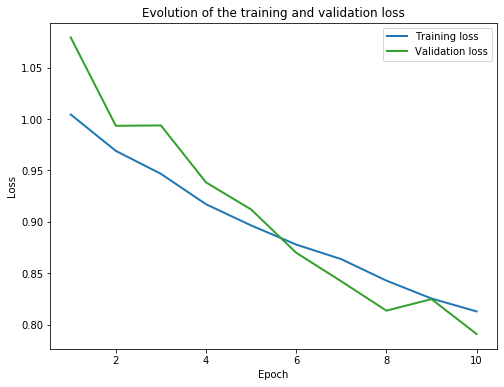

In [0]:
plot_losses(train_history, val_history)

### Accuracy of the trained model

In [0]:
compute_accuracy(net)


Accuracy of the network on the 30000 train images: 73.15 %
Accuracy of the network on the 5000 validation images: 71.94 %
Accuracy of the network on the 5000 test images: 61.54 %


**Baseline: Simple Convolutional Neural Network (form part II)**

<table>
<tr>
    <td>Accuracy on the test set:</td>
    <td>59.98 %</td>
</tr>
</table>

In [0]:
confusion_matrix = accuracy_per_class(net)

Class      Accuracy (%)
plane        63.93   
car          72.08   
bird         48.24   
cat          41.65   
deer         61.34   
dog          45.08   
frog         64.97   
horse        70.91   
ship         78.77   
truck        68.03   


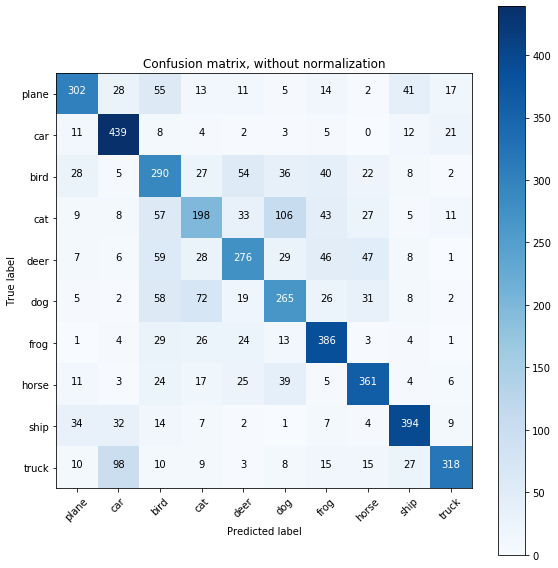

In [0]:
plot_confusion_matrix(confusion_matrix, classes,
                      title='Confusion matrix, without normalization')

### Going further

- [Coursera Course on CNN](https://www.coursera.org/learn/convolutional-neural-networks)
- [Stanford Course](http://cs231n.stanford.edu/syllabus.html)
- [PyTorch Tutorial](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)
- [How backpropagation works](http://michaelnielsen.org/blog/how-the-backpropagation-algorithm-works/) (Michael Nielsen)

If you feel like this was too easy peasy:

-Investigate further [optimization methods](https://pytorch.org/docs/stable/optim.html) beyond SGD, and Adam and their parameters.

-Look at ways to improve your network using regularization techniques

-Look at ways to visualize network activations for model interpretability

-Use transfer learning, in order to use torchvision with pretrained=True with some pretrained models


Acknowledgements: 
This tutorial is based on the [original PyTorch tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) and was adapted by [Antonin Raffin](http://araffin.github.io/) for the ROB313 course at ENSTA Paris. Thanks to Clement Pinard for feedback!


### More documentation/ questions to explore about Google Colab: 

-How to connect your Google Drive with Google Colab?

-How to import a new notebook and save it to your GDrive?

-How to use files which are contained in your GDrive?

Some tips [here](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d)




## Extras to read later
### Visualizing Convolution parameters:
[A guide to convolution arithmetic for deep learning](https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md) 
by Vincent Dumoulin, Francesco Visin 


### Documentation of autograd and Function: 
[Autograd](http://pytorch.org/docs/autograd)
